## Module/Variable/Data setup

In [1]:
%run ../src/python/helpers.py

%matplotlib inline
from numpy import nan
from numpy import arange

from pandas import read_feather
import seaborn as sns
import ipywidgets as w

#VARIABLES
cl = ['atc_1st','atc_2nd','atc_3rd','atc_4th','drug_concept_name']

data = read_feather("../data/aeolus_top5drugs.feather")

plot_settings()

## How many reports for a number of outcomes?

In [2]:
d = w.IntSlider(min=1,max=15,step=1,value=10)
d

IntSlider(value=10, max=15, min=1)

In [3]:
from numpy import arange
inds = arange(0,int(d.value),1)

In [4]:
out = 'outcome_concept_name'
series = freqXbyY(data,out,'id').sort_values(ascending=False)
outs = series.index.values[inds]

In [5]:
sub = data.query('{0} in @outs'.format(out))

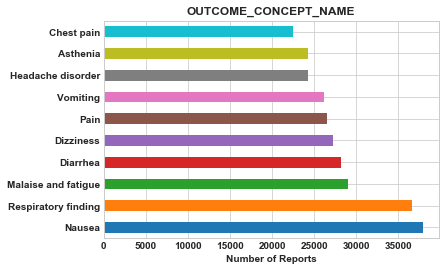

In [6]:
p = plot(series.iloc[inds],kind='barh')
q = p.set_title(p.get_ylabel().upper(),rotation=0,weight='bold')
q = p.set_ylabel("")
q = p.set_xlabel("Number of Reports",weight="bold")

## subset data by chosen drug class

In [7]:
import ipywidgets as w
labels = series.index

mds = w.SelectMultiple(options = labels, value = tuple(labels)[:10])
mds

SelectMultiple(index=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9), options=('Nausea', 'Respiratory finding', 'Malaise and fa…

In [8]:
sub = data.query('{0} in @mds.label'.format(out))

## How many are reported across the years?

In [9]:
series2 = freqXbyY(sub,'report_year',out)

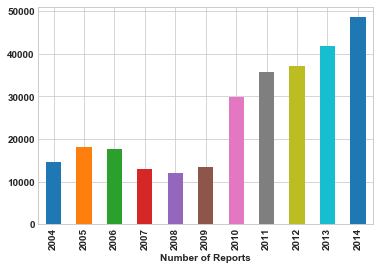

In [10]:
p = plot(series2,kind='bar')
q = p.set_title(p.get_ylabel().upper(),rotation=0,weight='bold')
q = p.set_ylabel(p.get_ylabel(),rotation=0)
q = p.set_xlabel("Number of Reports",weight="bold")

## subset data by chosen year(s)

In [11]:
import ipywidgets as w
labels = series2.index
mds = w.SelectMultiple(options = labels ,value = tuple(labels))
mds

SelectMultiple(index=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10), options=('2004', '2005', '2006', '2007', '2008', '200…

## How many are reported within this class across the sexes?

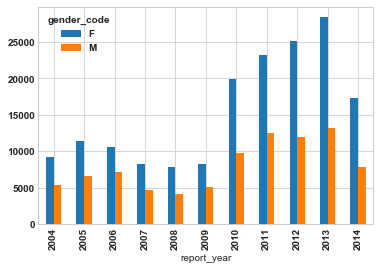

In [12]:
#plot variables for filtering/wrangling
bars = 'gender_code'
x = 'report_year'
count = 'id'
dat = clean_gender(sub).query('report_year in @mds.label')

#main
sub_dat = dat[[bars,x,count]]
plot_sub = sub_dat.groupby([bars,x]).count().reset_index(level=bars).pivot(columns=bars)
plot_sub.columns = plot_sub.columns.droplevel(level=0)
plot_sub.plot.bar()

## How many are reported within this class across ages?

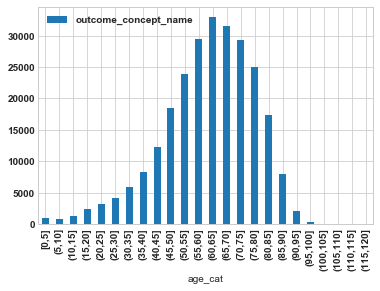

In [13]:
#plot variables for filtering/wrangling
grp = 'age_cat'

#main
dat[[out,grp]].groupby([grp]).count().plot.bar()

## How many are reported within this class across ages for each sex?

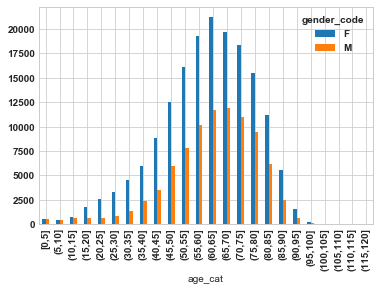

In [14]:
#plot variables for filtering/wrangling
bars = 'gender_code'
x = 'age_cat'
count = 'id'

#want to filter dataset for M/F gender and if report year was clicked or selected
sub = clean_gender(sub)[[bars,x,count]]

#main
plot_sub = sub.groupby([bars,x]).count().reset_index(level=bars).pivot(columns=bars)
plot_sub.columns = plot_sub.columns.droplevel(level=0)
plot_sub.plot.bar()